In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.8.0'

In [3]:
tf.keras.__version__

'2.8.0'

In [4]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [2]:
Checklist=["GPU","CPU"]
for device in Checklist:
    out_=tf.config.list_physical_devices(device)
    if len(out_)>0:
        print(f"{device} is available")
        print("details:", out_)
    else:
        print(f"{device} is not available")

GPU is not available
CPU is available
details: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
mnist=tf.keras.datasets.mnist
(X_train_full, y_train_full),(X_test, y_test)=mnist.load_data()

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
y_train_full.shape

(60000,)

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
X_train_full.dtype

dtype('uint8')

In [9]:
X_valid, X_train=X_train_full[:5000]/255.0,X_train_full[5000:] /255.0
y_valid,y_train=y_train_full[:5000], y_train_full[5000:]

(-0.5, 27.5, 27.5, -0.5)

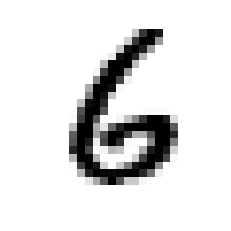

In [12]:
plt.imshow(X_train[1000], cmap="binary")
plt.axis("off")

<AxesSubplot:>

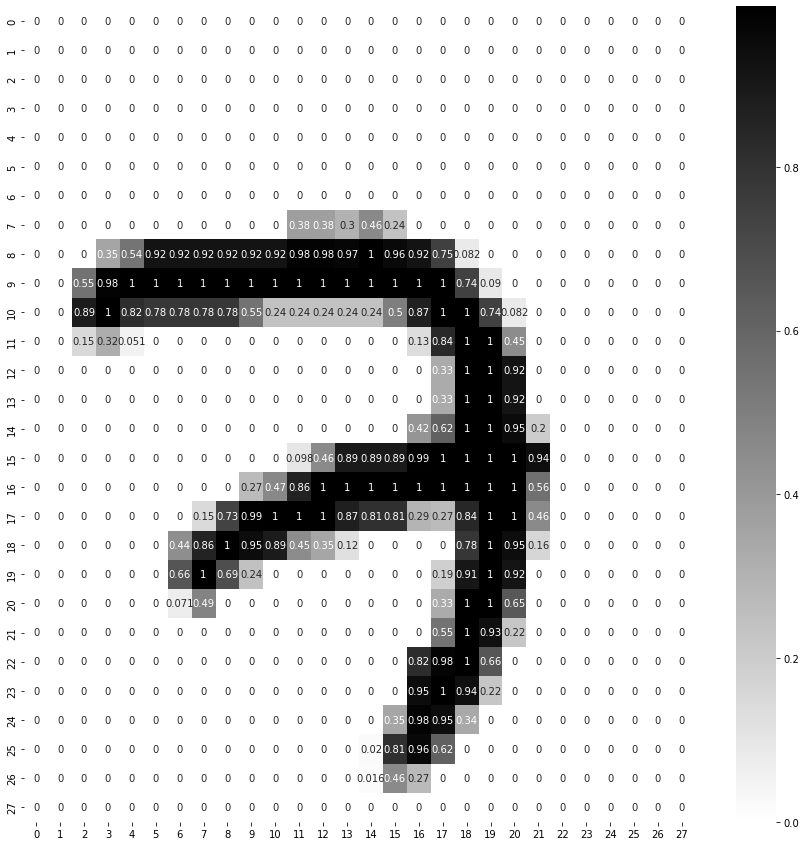

In [14]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True, cmap="binary")


<AxesSubplot:>

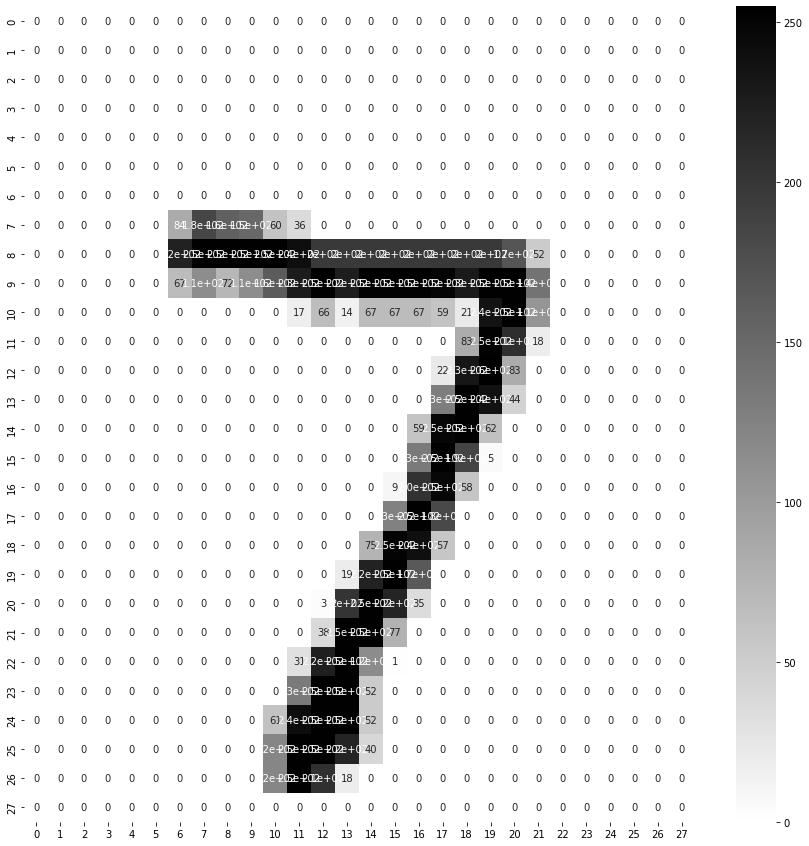

In [15]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(X_test[0], annot=True, cmap="binary")


In [18]:
LAYERS=[
    tf.keras.layers.Flatten(input_shape=[28,28], name="inputLayer"),
    tf.keras.layers.Dense(300,activation="relu", name="hiddenLayer1"),
    tf.keras.layers.Dense(100, activation="relu",name="hiddenLayer2"),
    tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")
]

In [19]:
model_clf=tf.keras.models.Sequential(LAYERS)

In [20]:
model_clf.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [24]:
#(None)->Input can be any number
'''
784*300(weights)+ 300(bias)=235500
300*100+100(bias)=30100
100*10+10(bias)=1010
235500+30100+1010=266,610-> this no of parameters are getting updated for every pass when we do the traning. So if you are training
this much no of parameters most of the non-linear functionality can be solved with the help of this parameters.
trainable params=266,610-> Number of weight and bias are going to be updated
'''


'\n784*300(weights)+ 300(bias)=235500\n300*100+100(bias)=30100\n100*10+10(bias)=1010\n235500+30100+1010=266,610-> this no of parameters are getting updated for every pass when we do the traning. So if you are training\nthis much no of parameters most of the non-linear functionality can be solved with the help of this parameters.\ntrainable params=266,610-> Number of weight and bias are going to be updated\n'

In [26]:
hidden1=model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [27]:
model_clf.get_layer(hidden1.name) is hidden1

True

# Get the weights of hidden layers

In [28]:
type(hidden1.get_weights())

list

In [29]:
hidden1.get_weights()
# first layer representing the weights, second is showing bias

[array([[ 0.07284969,  0.06857608,  0.06740029, ..., -0.03083934,
          0.0571177 , -0.05249117],
        [ 0.01853875, -0.05682937,  0.07233527, ..., -0.00735818,
         -0.06417238,  0.03959616],
        [-0.00851136,  0.0631181 , -0.00956979, ..., -0.01016166,
         -0.03864041, -0.0148254 ],
        ...,
        [-0.02650991, -0.06204936,  0.02746339, ...,  0.04942381,
         -0.06351876, -0.04923874],
        [ 0.00584403, -0.02274261, -0.05037056, ..., -0.04881473,
         -0.04183482, -0.00863796],
        [-0.02188053,  0.05797327,  0.00196297, ..., -0.01272886,
         -0.00395391, -0.06338322]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [30]:
# Set the weights
#hidden1.set_weights(hidden1.get_weights())

In [31]:
weights, bias=hidden1.get_weights()

In [32]:
print("shape\n", weights.shape, "\n")
weights

shape
 (784, 300) 



array([[ 0.07284969,  0.06857608,  0.06740029, ..., -0.03083934,
         0.0571177 , -0.05249117],
       [ 0.01853875, -0.05682937,  0.07233527, ..., -0.00735818,
        -0.06417238,  0.03959616],
       [-0.00851136,  0.0631181 , -0.00956979, ..., -0.01016166,
        -0.03864041, -0.0148254 ],
       ...,
       [-0.02650991, -0.06204936,  0.02746339, ...,  0.04942381,
        -0.06351876, -0.04923874],
       [ 0.00584403, -0.02274261, -0.05037056, ..., -0.04881473,
        -0.04183482, -0.00863796],
       [-0.02188053,  0.05797327,  0.00196297, ..., -0.01272886,
        -0.00395391, -0.06338322]], dtype=float32)

In [33]:
print("shape\n", bias.shape, "\n")
bias

shape
 (300,) 



array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [34]:
LOSS_FUNCTION="sparse_categorical_crossentropy"
OPTIMIZER="SGD"
METRICS=["accuracy"]
model_clf.compile(loss=LOSS_FUNCTION,
                 optimizer=OPTIMIZER,
                 metrics=METRICS)

In [35]:
EPOCHS=30
VALIDATION_SET=(X_valid,y_valid)
history=model_clf.fit(X_train,y_train,epochs=EPOCHS, validation_data=VALIDATION_SET)

Epoch 1/30
1719/1719 [==============================] - 7s 3ms/step - loss: 0.6041 - accuracy: 0.8448 - val_loss: 0.3059 - val_accuracy: 0.9138
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2871 - accuracy: 0.9182 - val_loss: 0.2389 - val_accuracy: 0.9336
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2350 - accuracy: 0.9335 - val_loss: 0.2023 - val_accuracy: 0.9436
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2005 - accuracy: 0.9429 - val_loss: 0.1796 - val_accuracy: 0.9488
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1752 - accuracy: 0.9499 - val_loss: 0.1558 - val_accuracy: 0.9578
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1552 - accuracy: 0.9557 - val_loss: 0.1441 - val_accuracy: 0.9612
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1390 - accuracy: 0.9609 - val_loss: 0.1391 - val_accuracy: